# Parameters Example:  
Model:      MD1  
Model_Name: MD1_MIN-Y_200-0.2-300-2__CEL-Adam_0.001.pt  
Trainer:    Guille  
## Data Processing:  
    Divider:        DIVIDERS_MIN  
    Clear Cover:    Yes  
## Model Shape:  
    Layer 1: Embedding:  
        embed_dim:  200  
        dropout:    0.2  
    Layer 2: Dropout_embed:  
        hidden_dim: 300  
        num_layers: 2  
## Training:  
    softmax:        no
    criterion:      CrossEntropyLoss  
    optimizer:      Adam  
    lr:             0.001  
    epochs:         300  
    patience:       15  
    total epochs:   30  
    best loss:      0.6047
## Loss list:
    [0.234, 0.23456, ... ]
Output sentence:    I am a widower and never had any we live very quietly in the so one of  


In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast
import seaborn as sns

In [63]:
df = pd.read_excel('model_tests.xlsx')
df.head()

,MODEL,MODEL_NAME,TRAINER,DATA PROCESSING,Unnamed: 4,Model Shape,Unnamed: 6,Unnamed: 7,Unnamed: 8,Training,...,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Output sentence,Loss list,Unnamed: 19,Unnamed: 20,Unnamed: 21,extra
0,NaN,NaN,NaN,NaN,NaN,Layer 1: Embedding,NaN,Layer 2: Dropout_embed,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,Divider,Clear Cover,embed_dim,dropout,hidden_dim,num_layers,softmax,...,epochs,patience,total epochs,best loss,NaN,NaN,NaN,NaN,NaN,NaN
2,MD1,NaN,Alvaro,DIVIDERS_ORIGINAL,Yes (delete cover),450,0.2,600,1,no,...,200,10,30,NaN,I am a widower and never had any we live very ...,"[5.967828273773193, 5.1509504318237305, 4.8069...",NaN,NaN,NaN,NaN
3,MD2,NaN,Alvaro,DIVIDERS_ALL,Yes (delete cover),450,0.2,600,1,no,...,200,10,23,NaN,I am a widower fellow back so as to make the c...,"[1.1426165103912354, 0.990385890007019, 1.5492...",NaN,NaN,NaN,NaN
4,MD3,NaN,Alvaro,DIVIDERS_MIN,Yes (delete cover),450,0.2,600,1,no,...,200,10,18,NaN,I am not still so short a theory as to me from...,"[1.5493043661117554, 1.1090360879898071, 1.241...",NaN,NaN,NaN,NaN


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MODEL            28 non-null     object 
 1   MODEL_NAME       0 non-null      float64
 2   TRAINER          18 non-null     object 
 3   DATA PROCESSING  19 non-null     object 
 4   Unnamed: 4       19 non-null     object 
 5   Model Shape      20 non-null     object 
 6   Unnamed: 6       19 non-null     object 
 7   Unnamed: 7       20 non-null     object 
 8   Unnamed: 8       19 non-null     object 
 9   Training         11 non-null     object 
 10  Unnamed: 10      19 non-null     object 
 11  Unnamed: 11      19 non-null     object 
 12  Unnamed: 12      19 non-null     object 
 13  Unnamed: 13      19 non-null     object 
 14  Unnamed: 14      19 non-null     object 
 15  Unnamed: 15      16 non-null     object 
 16  Unnamed: 16      1 non-null      object 
 17  Output sentence  1

In [65]:
df = df.iloc[:, :19]
df = df.iloc[2:20, :]

In [66]:
df.columns = ['ID', 'MODEL_NAME', 'TRAINER', 'DIVIDER', 'CLEAR_COVER', 'EMBED_DIM',
            'DROPOUT', 'HIDDEN_DIM', 'NUM_LAYERS', 'SOFTMAX', 'CRITERION', 'OPTIMIZER', 'LEARNING_RATE',
            'EPOCHS', 'PATIENCE', 'TOTAL_EPOCHS', 'BEST_LOSS', 'OUTPUT_SENTENCE', 'LOSS_LIST']

In [67]:
print(df.columns)

Index(['ID', 'MODEL_NAME', 'TRAINER', 'DIVIDER', 'CLEAR_COVER', 'EMBED_DIM',
       'DROPOUT', 'HIDDEN_DIM', 'NUM_LAYERS', 'SOFTMAX', 'CRITERION',
       'OPTIMIZER', 'LEARNING_RATE', 'EPOCHS', 'PATIENCE', 'TOTAL_EPOCHS',
       'BEST_LOSS', 'OUTPUT_SENTENCE', 'LOSS_LIST'],
      dtype='object')


In [69]:
#Excel formulas
#Aux
def convert_to_list(s):
    if pd.isna(s):
        return
    return ast.literal_eval(s)

def get_min(lt):
    if isinstance(lt, list):
        return min(lt)
    return np.nan

#Best loss
df['BEST_LOSS'] = df['LOSS_LIST'].apply(convert_to_list).apply(get_min)
#Compound name
df['MODEL_NAME'] = df['ID'].astype(str) + '_' + df['DIVIDER'].astype(str).apply(lambda x: x.split('_')[-1]) + '_'
df['MODEL_NAME'] = df['MODEL_NAME'] + df['EMBED_DIM'].astype(str) + '_' + df['DROPOUT'].astype(str) + '_' + df['HIDDEN_DIM'].astype(str) + '_' + df['NUM_LAYERS'].astype(str) + '_' + df['LEARNING_RATE'].astype(str) + '_' + df['TOTAL_EPOCHS'].astype(str) + '_' + (df['BEST_LOSS'].astype(str))

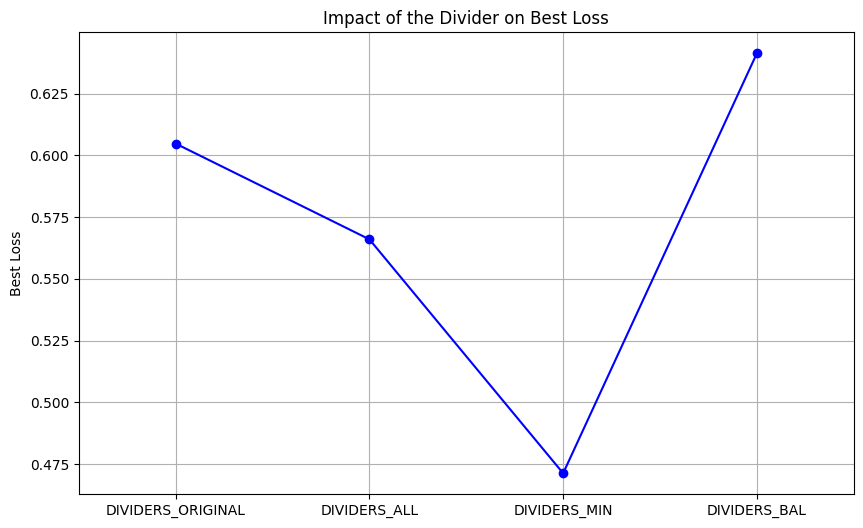

In [70]:
#First plot

df_1 = df.head(4)
plt.figure(figsize=(10, 6))
plt.plot(df_1['DIVIDER'], df_1['BEST_LOSS'], marker='o', linestyle='-', color='b')
plt.ylabel('Best Loss')
plt.title('Impact of the Divider on Best Loss')
plt.grid(True)
plt.xticks(df_1['DIVIDER'], ha='center')
plt.xlim(-0.5, 3.5)
plt.show()

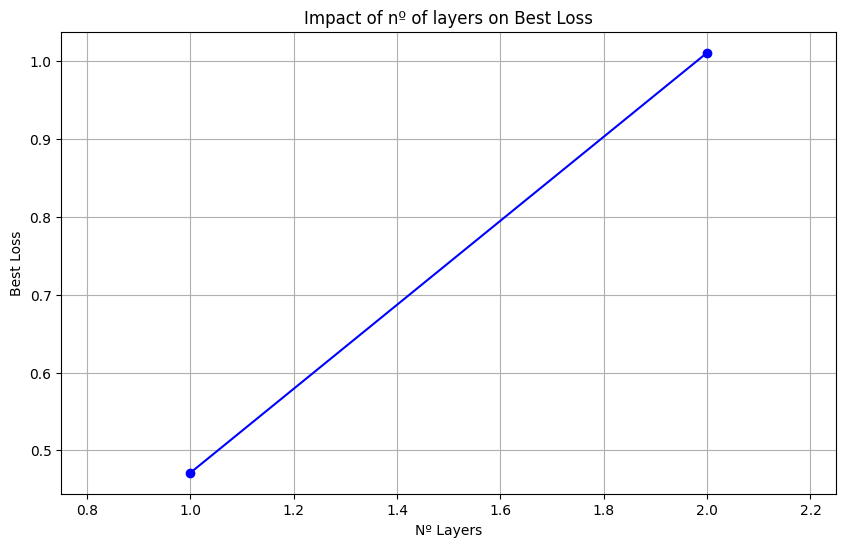

In [71]:
df_2 = df.iloc[[2, 4]]
plt.figure(figsize=(10, 6))
plt.plot(df_2['NUM_LAYERS'], df_2['BEST_LOSS'], marker='o', linestyle='-', color='b')
plt.xlabel('Nº Layers')
plt.ylabel('Best Loss')
plt.title('Impact of nº of layers on Best Loss')
plt.xlim(0.75, 2.25)
plt.grid(True)
plt.show()

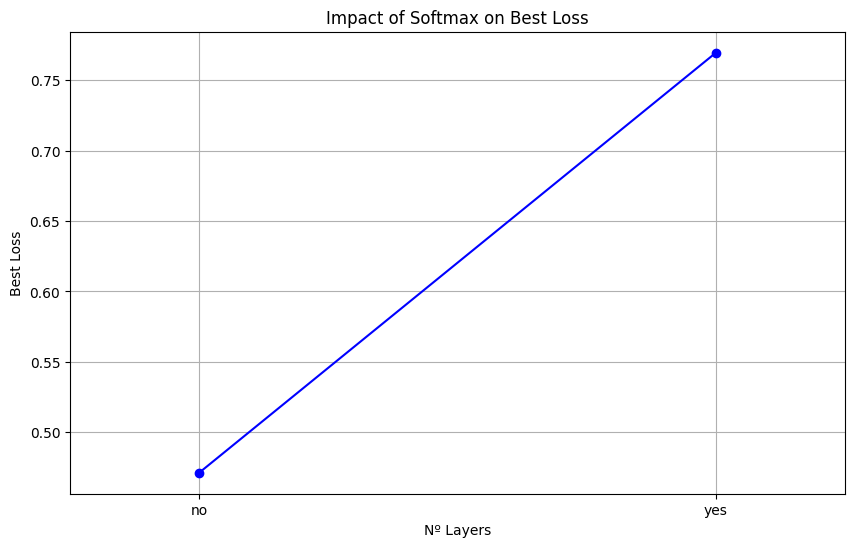

In [72]:
df_3 = df.iloc[[2, 5]]
plt.figure(figsize=(10, 6))
plt.plot(df_3['SOFTMAX'], df_3['BEST_LOSS'], marker='o', linestyle='-', color='b')
plt.xlabel('Nº Layers')
plt.ylabel('Best Loss')
plt.title('Impact of Softmax on Best Loss')
plt.xlim(-0.25, 1.25)
plt.grid(True)
plt.show()

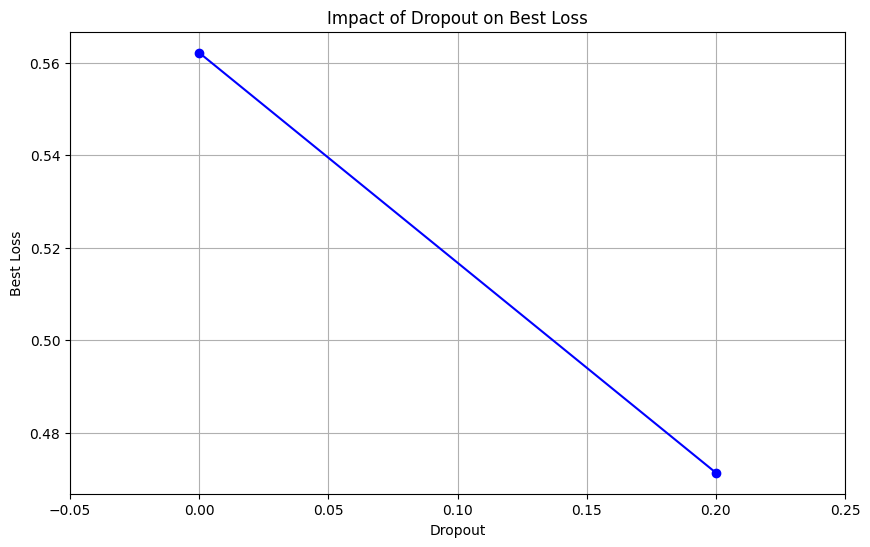

In [73]:
df_3 = df.iloc[[2, 6]]
plt.figure(figsize=(10, 6))
plt.plot(df_3['DROPOUT'], df_3['BEST_LOSS'], marker='o', linestyle='-', color='b')
plt.xlabel('Dropout')
plt.ylabel('Best Loss')
plt.title('Impact of Dropout on Best Loss')
plt.xlim(-0.05, 0.25)
plt.grid(True)
plt.show()

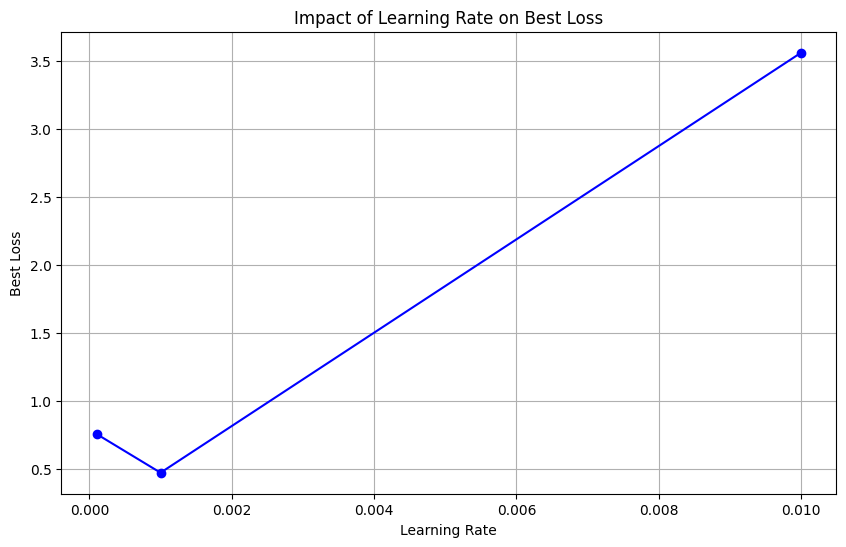

In [74]:
df_3 = df.iloc[[8, 2, 7]]
plt.figure(figsize=(10, 6))
plt.plot(df_3['LEARNING_RATE'], df_3['BEST_LOSS'], marker='o', linestyle='-', color='b')
plt.xlabel('Learning Rate')
plt.ylabel('Best Loss')
plt.title('Impact of Learning Rate on Best Loss')
plt.grid(True)
plt.show()

In [75]:
df_3 = df.iloc[[2, 9]]
df_3.head()

,ID,MODEL_NAME,TRAINER,DIVIDER,CLEAR_COVER,EMBED_DIM,DROPOUT,HIDDEN_DIM,NUM_LAYERS,SOFTMAX,CRITERION,OPTIMIZER,LEARNING_RATE,EPOCHS,PATIENCE,TOTAL_EPOCHS,BEST_LOSS,OUTPUT_SENTENCE,LOSS_LIST
4,MD3,MD3_MIN_450_0.2_600_1_0.001_18_0.4713026881217...,Alvaro,DIVIDERS_MIN,Yes (delete cover),450,0.2,600,1,no,CrossEntropyLoss,Adam,0.001,200,10,18,0.471303,I am not still so short a theory as to me from...,"[1.5493043661117554, 1.1090360879898071, 1.241..."
11,MD18,MD18_MIN_450_0.2_300_4_0.001_nan_0.913818057,Alvaro,DIVIDERS_MIN,Yes (delete cover),450,0.2,300,4,no,CrossEntropyLoss,Adam,0.001,200,25,NaN,0.913818,NaN,"[5.956544871, 4.919525402, 4.905601148, 4.8467..."


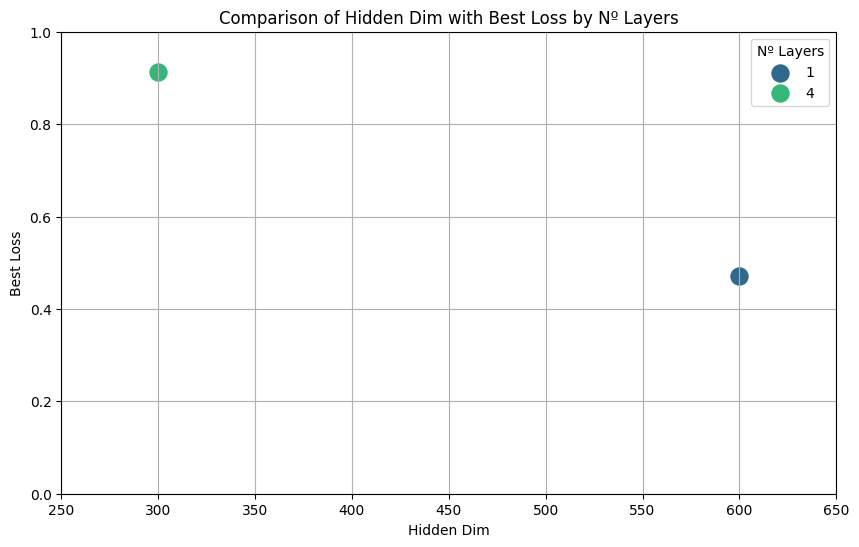

In [76]:
df_3 = df.iloc[[2, 9]]

plt.figure(figsize=(10, 6))
palette = sns.color_palette("viridis", df_3['NUM_LAYERS'].nunique())
colors = dict(zip(df_3['NUM_LAYERS'].unique(), palette))

for layer in df_3['NUM_LAYERS'].unique():
    subset = df_3[df_3['NUM_LAYERS'] == layer]
    plt.scatter(subset['HIDDEN_DIM'], subset['BEST_LOSS'], label=layer, color=colors[layer], s=150)
plt.xlabel('Hidden Dim')
plt.ylabel('Best Loss')
plt.title('Comparison of Hidden Dim with Best Loss by Nº Layers')
plt.legend(title='Nº Layers')
plt.grid(True)
plt.xlim(250, 650)
plt.ylim(0, 1)
plt.show()

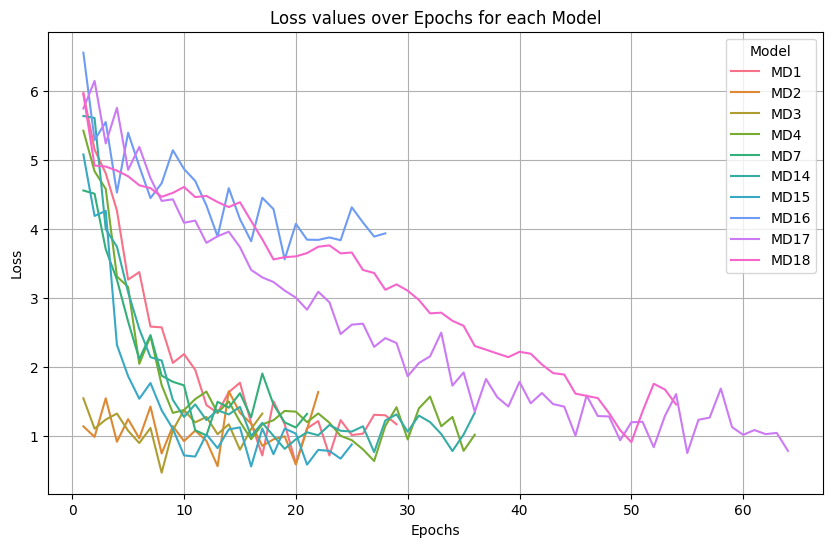

In [77]:
loss_models = df['LOSS_LIST'].apply(convert_to_list)[:10]
model_names = df['ID'][:10]

# Crear una figura para la gráfica
plt.figure(figsize=(10, 6))

# Usar seaborn para obtener una paleta de colores con suficientes colores
palette = sns.color_palette("husl", len(loss_models))

# Graficar cada lista de pérdidas con un color diferente
for i, (loss_list, model_name) in enumerate(zip(loss_models, model_names)):
    epochs = list(range(1, len(loss_list) + 1))
    plt.plot(epochs, loss_list, label=model_name, color=palette[i])

# Etiquetas y título
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss values over Epochs for each Model')

# Añadir la leyenda
plt.legend(title='Model')

# Mostrar la cuadrícula
plt.grid(True)

# Mostrar la gráfica
plt.show()